# **How Likely will a user click an ad displayed on a page they are visiting?**

### **Importing libraries and dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
dataset=pd.read_csv(r'C:\Users\Aviral.HP-PAVILION\Desktop\Machine Learning\Projects\Clicking_an_Ad\data.csv')
dataset

,Unnamed: 0,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,2,15706,320,50,1722,0,35,-1,79
1,1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15704,320,50,1722,0,35,100084,79
2,2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15704,320,50,1722,0,35,100084,79
3,3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15706,320,50,1722,0,35,100084,79
4,4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,1.311196e+19,0,14102103,1005,0,85f751fd,c4e18dd6,50e219e0,53de0284,...,1,0,21611,320,50,2480,3,299,100111,61
499996,499996,1.311197e+19,0,14102103,1005,1,d9750ee7,98572c79,f028772b,ecad2386,...,1,0,17614,320,50,1993,2,1063,-1,33
499997,499997,1.311202e+19,0,14102103,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,...,1,0,20633,320,50,2374,3,39,-1,23
499998,499998,1.311205e+19,0,14102103,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,...,1,0,20355,216,36,2333,0,39,100077,157


Here, **click** is the dependent attribute while all the other attributes are independent.
**site_id, site_domain, site_category, app_id, app_domain, app_category, device_id, device_ip, device_model** are categorical data which needs to be encoded to train the model.
**hour** should be converted to DateTime type.

### **EDA**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        500000 non-null  int64  
 1   id                500000 non-null  float64
 2   click             500000 non-null  int64  
 3   hour              500000 non-null  int64  
 4   C1                500000 non-null  int64  
 5   banner_pos        500000 non-null  int64  
 6   site_id           500000 non-null  object 
 7   site_domain       500000 non-null  object 
 8   site_category     500000 non-null  object 
 9   app_id            500000 non-null  object 
 10  app_domain        500000 non-null  object 
 11  app_category      500000 non-null  object 
 12  device_id         500000 non-null  object 
 13  device_ip         500000 non-null  object 
 14  device_model      500000 non-null  object 
 15  device_type       500000 non-null  int64  
 16  device_conn_type  50

No null values.

In [4]:
dataset[dataset.duplicated()==True].count()

Unnamed: 0          0
id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

No duplicates.

In [5]:
dataset=dataset.drop(columns=['Unnamed: 0'])
dataset=dataset[['id',
 'banner_pos',
 'hour',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C1',
 'C14',
 'C15',
 'C16',
 'C17',
 'C19',
 'C20',
 'C21',
 'C18',
 'click']]
dataset

,id,banner_pos,hour,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C1,C14,C15,C16,C17,C19,C20,C21,C18,click
0,1.000009e+18,0,14102100,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,15706,320,50,1722,35,-1,79,0,0
1,1.000017e+19,0,14102100,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,15704,320,50,1722,35,100084,79,0,0
2,1.000037e+19,0,14102100,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,15704,320,50,1722,35,100084,79,0,0
3,1.000064e+19,0,14102100,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,15706,320,50,1722,35,100084,79,0,0
4,1.000068e+19,1,14102100,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,18993,320,50,2161,35,-1,157,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.311196e+19,0,14102103,85f751fd,c4e18dd6,50e219e0,53de0284,d9b5648e,0f2161f8,a99f214a,...,1005,21611,320,50,2480,299,100111,61,3,0
499996,1.311197e+19,1,14102103,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,17614,320,50,1993,1063,-1,33,2,0
499997,1.311202e+19,0,14102103,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,42625159,...,1005,20633,320,50,2374,39,-1,23,3,0
499998,1.311205e+19,1,14102103,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,20355,216,36,2333,39,100077,157,0,0


Text(0.5, 1.0, 'Clicks per hour')

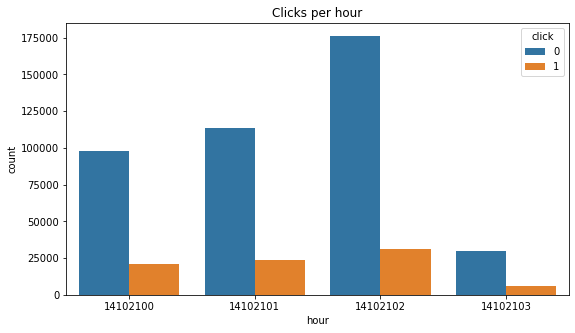

In [6]:
plt.figure(figsize=(9, 5))
sns.countplot(x='hour',hue='click',data=dataset)
plt.title("Clicks per hour")

Most activity was shown on **21st Oct, 2014** at **00:00** hour.

Users were least likely to click an ad on **21st Oct, 2014** at **03:00** hour.

Text(0.5, 1.0, 'Count of Clicked Ads from different Banner Positions')

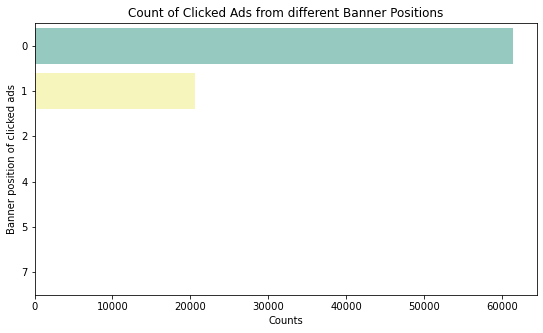

In [7]:
plt.figure(figsize=(9, 5))
sns.countplot(y='banner_pos',data=dataset[dataset['click']==1],palette='Set3')
plt.xlabel('Counts')
plt.ylabel('Banner position of clicked ads')
plt.title('Count of Clicked Ads from different Banner Positions')

Ads placed at banner postion **0** were clicked the most.

<AxesSubplot:ylabel='device_type'>

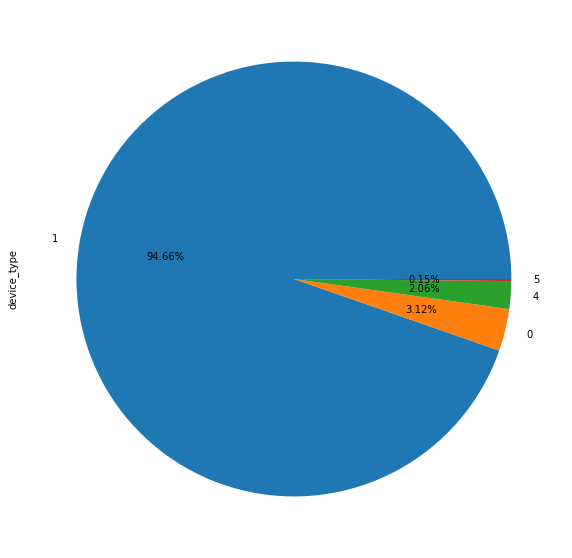

In [8]:
plt.figure(figsize=(18, 10))
dataset['device_type'].value_counts().plot(kind='pie',autopct='%1.2f%%')

Device type **1** is most widely used.

Text(0, 0.5, 'Number of times ad is displayed')

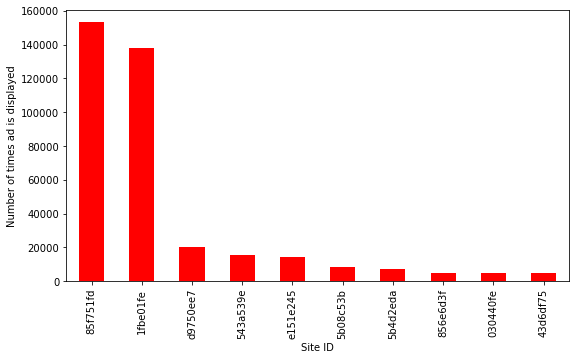

In [9]:
plt.figure(figsize=(9, 5))
dataset.site_id.value_counts().head(10).plot(kind='bar',color='red')
plt.xlabel("Site ID")
plt.ylabel("Number of times ad is displayed")

**85f751fd** site displays ads most number of times.

Text(0, 0.5, 'Ad ID')

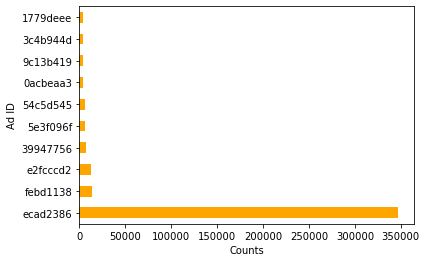

In [10]:
dataset.app_id.value_counts().head(10).plot(kind='barh',color='orange')
plt.xlabel('Counts')
plt.ylabel('Ad ID')

**ecad2386** displays most ads.

<AxesSubplot:>

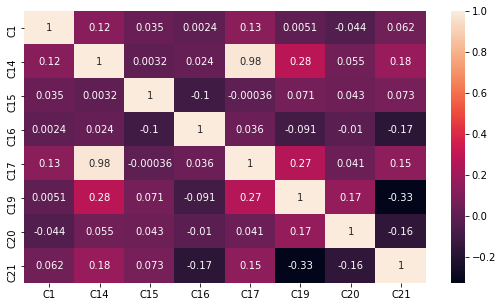

In [11]:
plt.figure(figsize=(9,5))
sns.heatmap(dataset.iloc[:,14:22].corr(),annot=True)

There were some **anonymous features** in the dataset so we need to find correlation between them.

We can see that **C14** and **C17** are highly correlated (98%) so one of them can be removed.

Other features have very little or no correlation between them.

### **Feature Engineering**

**Modifying datatype and deleting some features.**

In [12]:
dataset['hour']=pd.to_datetime(dataset['hour'],format='%y%m%d%H')

In [13]:
dataset.hour

0        2014-10-21 00:00:00
1        2014-10-21 00:00:00
2        2014-10-21 00:00:00
3        2014-10-21 00:00:00
4        2014-10-21 00:00:00
                 ...        
499995   2014-10-21 03:00:00
499996   2014-10-21 03:00:00
499997   2014-10-21 03:00:00
499998   2014-10-21 03:00:00
499999   2014-10-21 03:00:00
Name: hour, Length: 500000, dtype: datetime64[ns]

This also needs to be encoded in order to train the model.

In [14]:
dataset=dataset.drop(columns=['C14'])

**Label Encoding**

In [15]:
dataset.iloc[:,2:12]=dataset.iloc[:,2:12].astype('category')

In [16]:
for i in range(2,12):
    dataset.iloc[:,i]=dataset.iloc[:,i].cat.codes

In [17]:
dataset

,id,banner_pos,hour,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_conn_type,C1,C15,C16,C17,C19,C20,C21,C18,click
0,1.000009e+18,0,0,215,1503,2,1518,62,0,27538,...,2,1005,320,50,1722,35,-1,79,0,0
1,1.000017e+19,0,0,215,1503,2,1518,62,0,27538,...,0,1005,320,50,1722,35,100084,79,0,0
2,1.000037e+19,0,0,215,1503,2,1518,62,0,27538,...,0,1005,320,50,1722,35,100084,79,0,0
3,1.000064e+19,0,0,215,1503,2,1518,62,0,27538,...,0,1005,320,50,1722,35,100084,79,0,0
4,1.000068e+19,1,0,1687,910,0,1518,62,0,27538,...,0,1005,320,50,2161,35,-1,157,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.311196e+19,0,3,920,1217,6,550,107,2,27538,...,0,1005,320,50,2480,299,100111,61,3,0
499996,1.311197e+19,1,3,1436,957,19,1518,62,0,27538,...,0,1005,320,50,1993,1063,-1,33,2,0
499997,1.311202e+19,0,3,920,1217,6,1454,47,2,10695,...,0,1005,320,50,2374,39,-1,23,3,0
499998,1.311205e+19,1,3,657,113,19,1518,62,0,27538,...,0,1005,216,36,2333,39,100077,157,0,0


**Spliting into training and test set**

In [18]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**Scaling the features**

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### **Fitting Logistic Regression Model**

In [21]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

### **Predicting Test Set Results**

In [22]:
y_pred=classifier.predict(X_test)

### **Confusion Matrix and Accuracy**

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[83478   204]
 [16218   100]]


0.83578

So our model is **83.5%** accurate in predicting the results.